# BINOMIAL DISTRIBUTION

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Watch this lecture: [Binomial distributions](https://www.youtube.com/watch?v=8idr1WZ1A7Q&list=PLZHQObOWTQDOjmo3Y6ADm0ScWAlEXf-fp&index=1) | Probabilities of probabilities, part 1

Below here, i just tried to implement as code what is explained in the video, to clear my understanding.

In [ ]:
simulations=50
prob_success = 0.95
n = 50
sims = []
for _ in range(simulations):
    x = np.random.uniform(0, 1, n) # generating a random number between 0 and 1
    x = np.where(x<prob_success, 1, 0) # giving a 1 if random number is less than 0.95 else 0
    sims.append(x)

sims = np.array(sims) #all 50 simulations
sims[:3]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [ ]:
sims_pos = np.sum(sims, axis=1) # summing up the positive outcomes for each simulation
sims_pos # we see 50 simulations here, the entry means eg, 47 means for first simulation, we got 47 positive outcome out of 50

array([48, 50, 50, 48, 47, 49, 48, 47, 49, 48, 47, 48, 44, 46, 49, 49, 49,
       48, 49, 47, 47, 49, 49, 49, 47, 47, 47, 50, 48, 47, 47, 48, 49, 48,
       49, 50, 49, 50, 50, 47, 47, 50, 45, 47, 46, 50, 47, 47, 48, 50])

In [ ]:
# how many such 'k' positive outcomes were observed in the simulated data
k=49
np.count_nonzero(sims_pos==k)/simulations

0.24

In [ ]:
# unique number of positive outcomes observed
# 46 means 46 times out of 50 were positive
np.unique(sims_pos)

array([44, 45, 46, 47, 48, 49, 50])

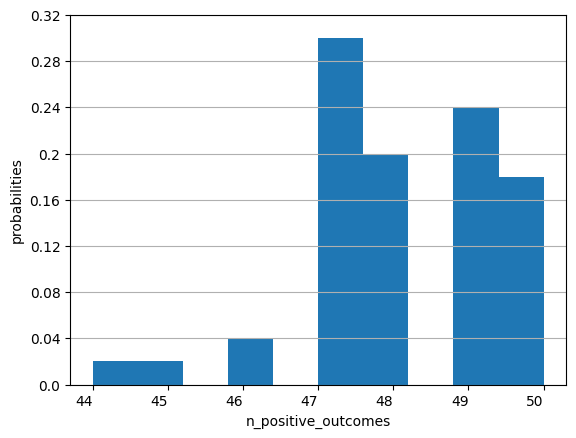

In [ ]:
plt.hist(sims_pos)
plt.ylabel('probabilities')
plt.xlabel('n_positive_outcomes')
locs, _ = plt.yticks()
plt.yticks(locs, locs/len(sims_pos))
plt.xticks(np.unique(sims_pos), horizontalalignment="right")
plt.grid(axis='y')
plt.show()

## Lets try bigger simulation experiment

simulations=250000, 50 outcomes each, Success probability=0.95

In [ ]:
simulations=250000
prob_success = 0.95
n = 50
sims = []
for _ in range(simulations):
    x = np.random.uniform(0, 1, n)
    x = np.where(x < prob_success, 1, 0)
    sims.append(x)

In [ ]:
sims_pos = np.sum(sims, axis=1)
sims_pos

array([48, 48, 47, ..., 48, 45, 48])

In [ ]:
# probability for getting k success out of n outcome
np.count_nonzero(sims_pos==46)/simulations

0.136056

Matplotlib, [histogram attribute density when True wasn't giving right results](https://stackoverflow.com/questions/55555466/matplotlib-hist-function-argument-density-not-working#:~:text=This%20is%20a%20known%20issue%20in%20Matplotlib.&text=When%20density%20%3D%20False%2C%20the%20histogram,does%20not%20mean%20anything%20useful.), so resorted to adjusting yticks

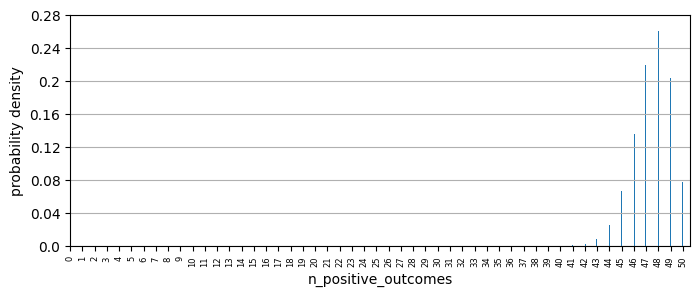

In [ ]:
# plot probability density
plt.figure(figsize=(8,3))
plt.hist(sims_pos, bins='auto')
plt.xticks(range(51), rotation=90, fontsize=6)
plt.ylabel('probability density')
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(sims_pos),3))
plt.xlabel('n_positive_outcomes')
plt.grid(axis='y')
plt.show()

Seaborn visualization is simpler

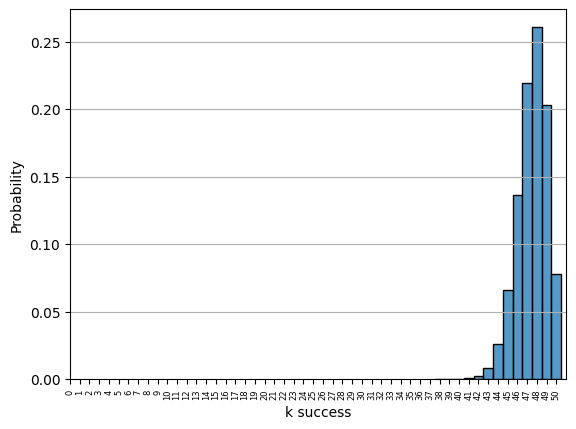

In [ ]:
import seaborn as sns
sns.histplot(data=sims_pos, stat='probability', discrete=True)
plt.grid(axis='y')
plt.xlim([1, 51])
plt.xticks(range(51), rotation=90, fontsize=6, ha='center')
plt.xlabel('k success')
plt.show()

## Computing Binomial probability using the probability function

In [ ]:
import math

# defining a function here to compute the probability
def compute_binomial_prob(n, k, p):
    binom_coeff = math.comb(n, k) ## getting total number of all possible combinations
    prob_success = p**k  # the outcomes are independint so we multply all k positive probabilities
    prob_failure = (1-p)**(n-k) # and these are product of negative probabilities for negative outcomes

    return binom_coeff * prob_success * prob_failure

In [ ]:
compute_binomial_prob(50, 48, 0.95)

0.2611013703988193

In [ ]:
compute_binomial_prob(50, 47, 0.95)

0.21987483823058493

## Compare the probabilities from our simulation experiment with that computed using the probability function

Binomial probabilty for 46 success out 50

In [ ]:
sim_exp_result = np.count_nonzero(sims_pos==46)/simulations
sim_exp_result

0.136056

In [ ]:
compute_binomial_prob(50, 46, 0.95)

0.13597522890575658

Binomial probabilty for 42 success out 50

In [ ]:
np.count_nonzero(sims_pos==42)/simulations

0.00232

In [ ]:
compute_binomial_prob(50, 42, 0.95)

0.00243235853107612